<a href="https://colab.research.google.com/github/Sorrawichsu/CIFAR-10-Image-Classification/blob/main/Image_Classification_with_CIFAR_10_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Datasets

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


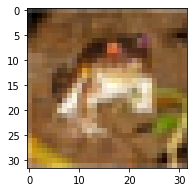

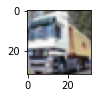

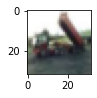

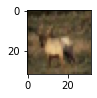

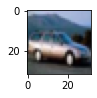

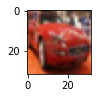

In [ ]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_X[i])
  plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Convert data to float64

In [ ]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

One-hot encoding

In [ ]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

Sequential model

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Configure the optimizer and compile the model

In [ ]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

Train Model

In [ ]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 229s 146ms/step - loss: 1.6995 - accuracy: 0.3834 - val_loss: 1.3389 - val_accuracy: 0.5296
Epoch 2/10
1563/1563 [==============================] - 227s 146ms/step - loss: 1.3164 - accuracy: 0.5257 - val_loss: 1.1920 - val_accuracy: 0.5838
Epoch 3/10
1563/1563 [==============================] - 229s 147ms/step - loss: 1.1523 - accuracy: 0.5886 - val_loss: 1.0906 - val_accuracy: 0.6137
Epoch 4/10
1563/1563 [==============================] - 227s 145ms/step - loss: 1.0349 - accuracy: 0.6328 - val_loss: 1.0424 - val_accuracy: 0.6346
Epoch 5/10
1563/1563 [==============================] - 226s 145ms/step - loss: 0.9440 - accuracy: 0.6646 - val_loss: 0.9753 - val_accuracy: 0.6604
Epoch 6/10
1563/1563 [==============================] - 226s 145ms/step - loss: 0.8624 - accuracy: 0.6968 - val_loss: 0.9615 - val_accuracy: 0.6625
Epoch 7/10
1563/1563 [==============================] - 226s 145ms/step - loss: 0.7909 - accuracy: 0.7199 - val_

Calculate accuracy 

In [ ]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 9s 30ms/step - loss: 0.9318 - accuracy: 0.6832
68.32000017166138


Save model

In [ ]:
model.save("model1_cifar_10epoch.h5")

Class dict

In [ ]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("Gold.Ship.full.3294834.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
# pred = model.predict_classes([im])[0]
pred = (model.predict([im])[0] > 0.5).astype("int32") 
# fix tensorflow 2.6 don't have predict_classes
# predictions = model.predict_classess(x_test)
# predictions = (model.predict(x_test) > 0.5).astype("int32")


idx = -1
for i in range(len(pred)):
  if pred[i] == 1:
    idx = i
    break;
print(results[idx])

automobile


Project GUI

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify the images
from keras.models import load_model
model = load_model('model1_cifar_10epoch.h5')
#dictionary to label all the CIFAR-10 dataset classes.
classes = { 
    0:'aeroplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck' 
}
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification CIFAR10')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
        (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,
  padx=10,pady=5)
upload.configure(background='#364156', foreground='white',
    font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Image Classification CIFAR10",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

TclError: ignored